In [112]:
import numpy as ny 
import pandas as ps
import re
import seaborn as sb
import matplotlib.pyplot as ml
from sklearn.preprocessing import LabelEncoder as le
from sklearn.feature_selection import chi2 as cc

In [21]:
ps.set_option("display.max_columns",None)
ps.set_option("display.expand_frame_repr",False)
ps.set_option("max_colwidth",-1)

In [23]:
DF=ps.read_csv(r"https://raw.githubusercontent.com/divyanshu132/Bank-Customer-Churn-Prediction/master/Churn_Modelling.csv")

In [25]:
DF.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
DF.corr(method="pearson")

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


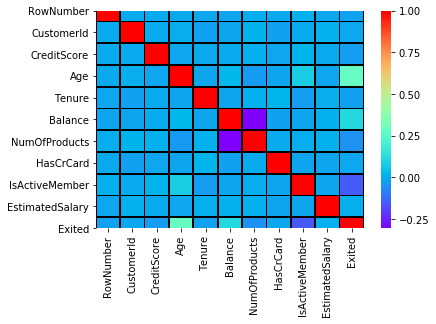

In [29]:
sb.heatmap(DF.corr(method="pearson"),cmap="rainbow",linecolor="k",linewidths=0.7)

In [71]:
DF["Tenure"]=le.fit_transform(DF["Tenure"])

In [92]:
le=LabelEncoder()
le.fit(DF["Tenure"])
DF["Geography"]=le.fit_transform(DF["Geography"])
DF["Gender"]=le.fit_transform(DF["Gender"])

In [93]:
DF.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4     989 
9     984 
6     967 
10    490 
0     413 
Name: Tenure, dtype: int64

In [167]:
x=DF.drop("Surname",axis=1)
y=DF.Surname

In [168]:
ch=cc(x,y)

In [169]:
DF

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [172]:
DF["Surname"]=le.fit_transform(DF["Surname"])

TypeError: fit_transform() missing 1 required positional argument: 'y'

In [173]:
li=[du,DF]

In [174]:
du={'kl':9}

In [175]:
li

[{'kl': 9},
       RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
 0     1          15634602    1115     619          0          0       42   2       0.00       1              1          1               101348.88        1     
 1     2          15647311    1177     608          2          0       41   1       83807.86   1              0          1               112542.58        0     
 2     3          15619304    2040     502          0          0       42   8       159660.80  3              1          0               113931.57        1     
 3     4          15701354    289      699          0          0       39   1       0.00       2              0          0               93826.63         0     
 4     5          15737888    1822     850          2          0       43   2       125510.82  1              1          1               79084.10         0     
 ...  ..              

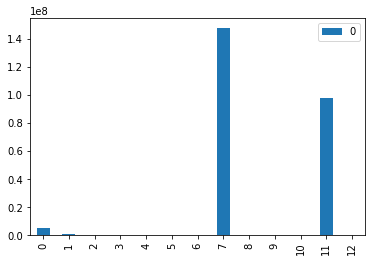

In [176]:
ps.DataFrame(ch[0]).plot(kind="bar")

In [177]:
x.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [178]:
p=ps.Series(ch[0],index=x.columns)
p.sort_values(ascending=False,inplace=True)

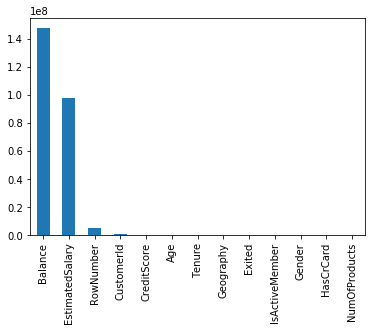

In [179]:
p.plot.bar()

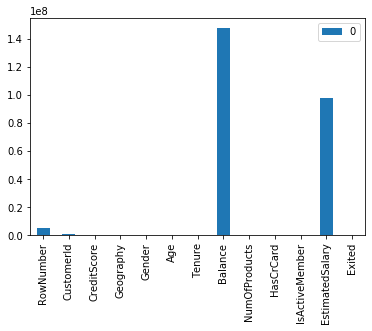

In [186]:
ps.DataFrame(ch[0],index=x.columns).plot(kind="bar")

In [187]:
g=ps.DataFrame(ch[0],index=x.columns)

In [205]:
g

,0
RowNumber,4.892262e+06
CustomerId,9.722750e+05
CreditScore,4.088981e+04
Geography,2.723735e+03
Gender,1.334942e+03
Age,8.245087e+03
Tenure,4.872874e+03
Balance,1.476288e+08
NumOfProducts,6.576917e+02
HasCrCard,8.445130e+02
